# main

In [111]:
!pip install openpyxl --quiet

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [112]:
train_data = pd.read_csv('/data/notebook_files/train.csv', dtype=str)
test_data = pd.read_csv('/data/notebook_files/test.csv', dtype=str)

FIRSTLY WE HAVE TO DO DATA RESEARCH

In [113]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [114]:
train_data_columns = train_data.columns
train_data_columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [115]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8492 non-null   object
 2   CryoSleep     8476 non-null   object
 3   Cabin         8494 non-null   object
 4   Destination   8511 non-null   object
 5   Age           8514 non-null   object
 6   VIP           8490 non-null   object
 7   RoomService   8512 non-null   object
 8   FoodCourt     8510 non-null   object
 9   ShoppingMall  8485 non-null   object
 10  Spa           8510 non-null   object
 11  VRDeck        8505 non-null   object
 12  Name          8493 non-null   object
 13  Transported   8693 non-null   object
dtypes: object(14)
memory usage: 950.9+ KB


In [116]:
# ыplitting cabin into deck, cabin number, and side because giving the model so many unique values is not an option
train_data['Deck'] = train_data['Cabin'].str.split('/').str[0]
train_data['Num'] = train_data['Cabin'].str.split('/').str[1]
train_data['Side'] = train_data['Cabin'].str.split('/').str[2]

In [117]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


looking for null data

In [118]:
train_data.isna().sum().reset_index()

,index,0
0,PassengerId,0
1,HomePlanet,201
2,CryoSleep,217
3,Cabin,199
4,Destination,182
5,Age,179
6,VIP,203
7,RoomService,181
8,FoodCourt,183
9,ShoppingMall,208


replacing null data 

In [119]:
train_data['HomePlanet'].fillna('Unknown', inplace=True) # we are giving a new planet like unknown because in fact we do not know avout that and model can use it somehow

train_data['CryoSleep'].fillna('False', inplace=True) # there we are filling nan data with False bacuse proportion of True/False in whole data is 0.35/0.64

train_data['Destination'].fillna('TRAPPIST-1e', inplace=True) # так как почти 70% пассажиров летели туда то логично просто взять этот destination

train_data['Age'].fillna(train_data['Age'].median(), inplace=True) # filling nan data with median age

train_data['VIP'].fillna('False', inplace=True) # filling with the mode(False)

spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in spending_columns:
    train_data[col].fillna(0, inplace=True) # filling all spending with 0 because we have no data that they spend some money

train_data['Name'].fillna('Name', inplace=True) 

train_data['Deck'].fillna('Unknown', inplace=True)

train_data['Side'].fillna('Unknown', inplace=True)

In [120]:
train_data.drop(['Cabin', 'Num', 'Name', 'PassengerId'], axis=1, inplace=True) # we are deleting the colums in which every data is unique

In [121]:
train_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Side'],
      dtype='object')

now there is no null data

In [122]:
train_data.isna().sum()

HomePlanet 0
CryoSleep 0
Destination 0
Age 0
VIP 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0
Deck 0
Side 0
dtype: int64

working with types of data, because most of models can work only with number types

In [123]:
numeric_colums = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in numeric_colums:
    train_data[i] = pd.to_numeric(train_data[i], errors='coerce')

In [124]:
train_data['CryoSleep'] = train_data['CryoSleep'].map({'True': True, 'False': False})
train_data['VIP'] = train_data['VIP'].map({'True': True, 'False': False})
train_data['Transported'] = train_data['Transported'].map({'True': True, 'False': False})

In [125]:
train_data.dtypes.reset_index()

,index,0
0,HomePlanet,object
1,CryoSleep,bool
2,Destination,object
3,Age,float64
4,VIP,bool
5,RoomService,float64
6,FoodCourt,float64
7,ShoppingMall,float64
8,Spa,float64
9,VRDeck,float64


encoding columns with type - object

In [126]:
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)

In [127]:
# boolen type making into int
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['Transported'] = train_data['Transported'].astype(int)

In [128]:
train_data.dtypes.reset_index()

,index,0
0,CryoSleep,int64
1,Age,float64
2,VIP,int64
3,RoomService,float64
4,FoodCourt,float64
5,ShoppingMall,float64
6,Spa,float64
7,VRDeck,float64
8,Transported,int64
9,HomePlanet_Europa,uint8


and now we have look for correlation between columns and leave only good features in order to overcome the potential 'noise'

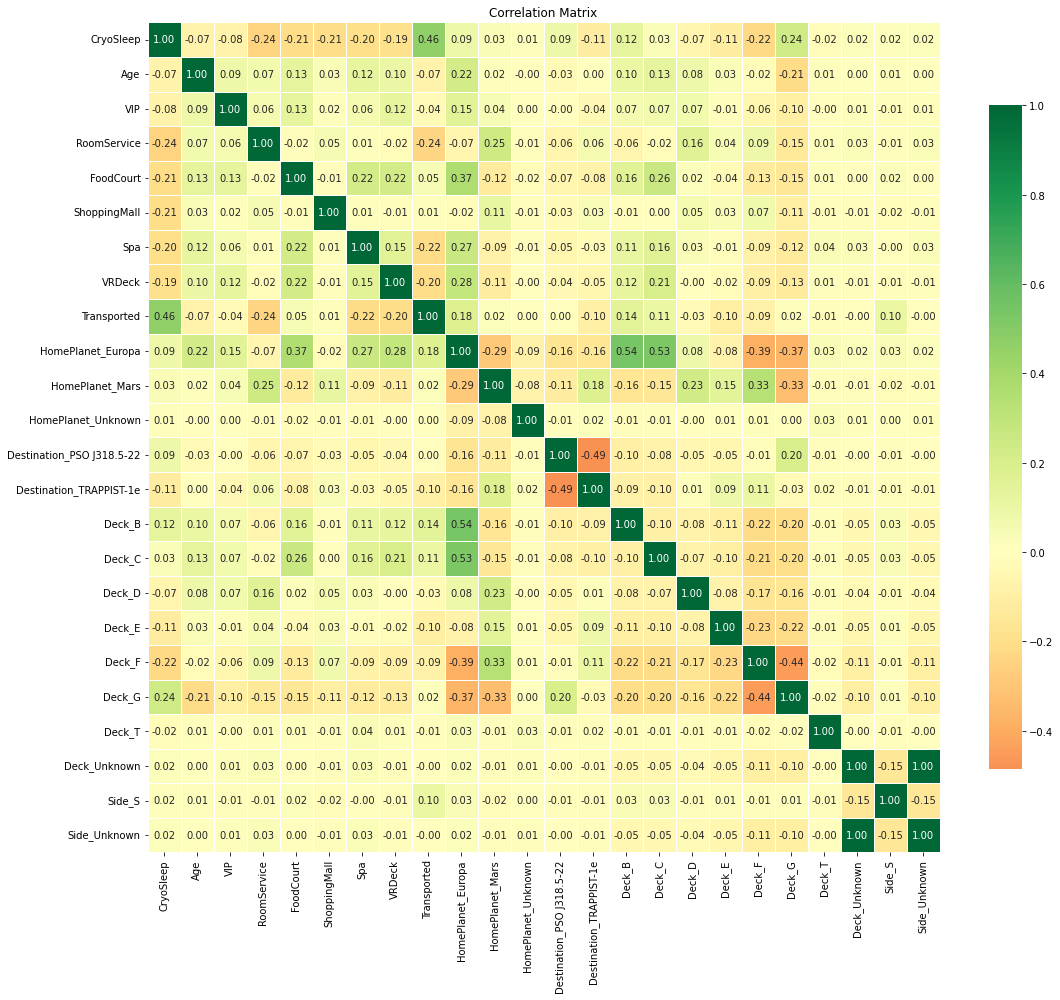

In [129]:
correlations = train_data.corr()['Transported'].drop('Transported').sort_values(ascending=False)

plt.figure(figsize=(16, 14))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn', fmt='.2f', 
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

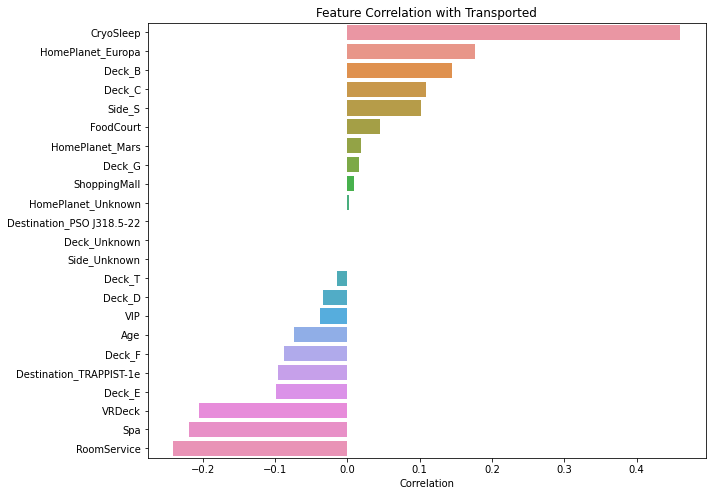

In [130]:
correlations = train_data.corr()['Transported'].drop('Transported').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Transported')
plt.xlabel('Correlation')
plt.show()

now we have to divide out train data to x(features) and y(target)

In [131]:
X = train_data.drop('Transported', axis=1) # features
y = train_data['Transported']         # target

In [132]:
# checking what we got
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (8693, 23)
y shape: (8693,)


now we divide out train data to "training data" and validation data(in order to check if our model works good with unfamiliar data)

In [133]:
from sklearn.model_selection import train_test_split

# splitting 80% for studying and 20% fr validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2, # 20% for validation
    random_state=42
)

# checking splitting
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (6954, 23)
X_val shape: (1739, 23)
y_train shape: (6954,)
y_val shape: (1739,)


In [134]:
param_grid_fr_1 = {
    'n_estimators': [50, 100, 150, 250],
    'max_depth': [8, 12, 15, 18],
}

# creating GridSearch
grid_search_fr_1 = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_fr_1,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# training model
print("Searching for best parameters...")
grid_search_fr_1.fit(X_train, y_train)

# best parameters 
print(f"\nBest parameters: {grid_search_fr_1.best_params_}")
print(f"Best cross-validation score: {grid_search_fr_1.best_score_:.4f}")

Searching for best parameters...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters: {'max_depth': 12, 'n_estimators': 250}
Best cross-validation score: 0.8041


In [141]:
model_rf = RandomForestClassifier(
    n_estimators=200 ,
    max_depth=12 ,
    max_features='sqrt',
    random_state=42
)

# training model with trainig data
print("training model")
model_rf.fit(X_train, y_train)
print("model trained")

# checking accuracy on train data
train_accuracy = model_rf.score(X_train, y_train)
print(f"model accuracy on train: {train_accuracy:.4f}")

# checking model accuracy on validation data
val_accuracy = model_rf.score(X_val, y_val)
print(f"model accuracy on validation data: {val_accuracy:.4f}")

training model
model trained
model accuracy on train: 0.8863
model accuracy on validation data: 0.7930


we try a XGBoost

In [136]:
!pip install xgboost

from xgboost import XGBClassifier


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [137]:
param_grid_x_1 = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 30, 50],
    'learning_rate': [0.1, 0.3]
} 

grid_search_xgb = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'), 
    param_grid_x_1,  
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("training model started")
grid_search_xgb.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search_xgb.best_params_}") 
print(f"Best cross-validation score: {grid_search_xgb.best_score_:.4f}")

training model started
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best cross-validation score: 0.8028


In [138]:
# now we train our model with best parameters
model_xgb = XGBClassifier(
    n_estimators=200,       
    max_depth=9,        
    learning_rate=0.1,    
    min_child_weight=3, 
    colsample_bytree=0.8,    
    random_state=42
)

print("training XGBoost model...")
model_xgb.fit(X_train, y_train)
print("model trained")

train_accuracy_xgb = model_xgb.score(X_train, y_train)
print(f"XGBoost accuracy on train: {train_accuracy_xgb:.4f}")

val_accuracy_xgb = model_xgb.score(X_val, y_val)
print(f"XGBoost accuracy on validation: {val_accuracy_xgb:.4f}")

overfitting_xgb = train_accuracy_xgb - val_accuracy_xgb
print(f"Overfitting: {overfitting_xgb:.4f}")

training XGBoost model...
model trained
XGBoost accuracy on train: 0.9058
XGBoost accuracy on validation: 0.7953
Overfitting: 0.1105


In [139]:
# data processing as we done with train data

passenger_ids = test_data['PassengerId'].copy()

test_data['Deck'] = test_data['Cabin'].str.split('/').str[0]
test_data['Num'] = test_data['Cabin'].str.split('/').str[1]
test_data['Side'] = test_data['Cabin'].str.split('/').str[2]

test_data['HomePlanet'].fillna('Unknown', inplace=True)
test_data['CryoSleep'].fillna('False', inplace=True)
test_data['Destination'].fillna('TRAPPIST-1e', inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['VIP'].fillna('False', inplace=True)

spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in spending_columns:
    test_data[col].fillna(0, inplace=True)

test_data['Name'].fillna('Name', inplace=True)
test_data['Deck'].fillna('Unknown', inplace=True)
test_data['Side'].fillna('Unknown', inplace=True)

test_data.drop(['Cabin', 'Num', 'Name', 'PassengerId'], axis=1, inplace=True)

numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in numeric_columns:
    test_data[i] = pd.to_numeric(test_data[i], errors='coerce')

test_data['CryoSleep'] = test_data['CryoSleep'].map({'True': True, 'False': False})
test_data['VIP'] = test_data['VIP'].map({'True': True, 'False': False})

test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)

test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)
test_data['VIP'] = test_data['VIP'].astype(int)

train_columns = [col for col in train_data.columns if col != 'Transported']

for col in train_columns:
    if col not in test_data.columns:
        test_data[col] = 0

test_data = test_data[train_columns]

print("Test data preprocessing complete!")
print(f"Test data shape: {test_data.shape}")

# prediciton

predictions_rf = model_rf.predict(test_data)
print(f"\nRandom Forest predictions done! Total: {len(predictions_rf)}")

predictions_xgb = model_xgb.predict(test_data)
print(f"XGBoost predictions done! Total: {len(predictions_xgb)}")

# submission files

submission_rf = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': predictions_rf.astype(bool)
})
submission_rf.to_csv('submission_rf.csv', index=False)
print("submission_rf.csv created")

submission_xgb = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': predictions_xgb.astype(bool)
})
submission_xgb.to_csv('submission_xgb.csv', index=False)
print("submission_xgb.csv created")

Test data preprocessing complete!
Test data shape: (4277, 23)

Random Forest predictions done! Total: 4277
XGBoost predictions done! Total: 4277
submission_rf.csv created
submission_xgb.csv created
